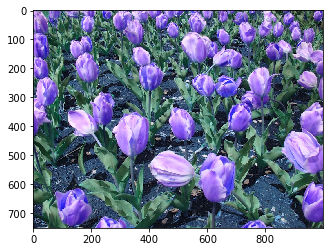

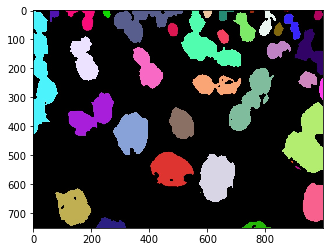

In [9]:
import os
import sys
import cv2

def displayImage(img,title=""):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def displayImageByMatplotlib(img,title=""):
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    im_list = np.asarray(img)
    plt.imshow(im_list)
    plt.show()

import cv2
import numpy as np
import random

# Read image file
#args          = sys.argv
fileNameImage = 'tulip.jpg'
img           = cv2.imread(fileNameImage, cv2.IMREAD_COLOR)
displayImageByMatplotlib(img)

# Masking Operation
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

# Masking Operation
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, img_flowers  = cv2.threshold(img_H, 140, 255, cv2.THRESH_BINARY)

# Get Segmentations 
numComp, labels, stats, centroids = cv2.connectedComponentsWithStats(img_flowers)

# Coloring by randomly selected colors
img           = np.zeros(img.shape[0:3])
height, width = img.shape[0:2]
cols = []
for i in range(1, numComp):
    cols.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))
for i in range(1, numComp):
    img[labels==i,] = cols[i-1]
    
# Display Final Results
cv2.imwrite('result.jpg', img)
img = cv2.imread('result.jpg', cv2.IMREAD_COLOR)
displayImageByMatplotlib(img)